In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Data Import and cleaning

In [425]:
grc = pd.read_csv("data/year_osward_grocery.csv", index_col="area_id")
grc.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
area_id,,,,,,,,,,,,,,,,,,,,,
E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,11.00,...,37315,14370.0,7469.0,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905
E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,15.00,...,14474,10845.0,5228.0,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706
E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,11.00,...,32138,13856.0,6750.0,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271
E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,11.00,...,16223,10850.0,5300.0,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172
E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,13.69,...,17522,11348.0,5515.0,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362


In [426]:
diab = pd.read_csv("data/diabetes_estimates_osward_2016.csv", index_col = "area_id")
diab.head()

,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
area_id,,,
E05000026,13136,1068,8.1
E05000027,8954,631,7.0
E05000028,12032,958,8.0
E05000029,8853,700,7.9
E05000030,8813,640,7.3


In [427]:
areas = set(grc.index).intersection(set(diab.index))
print(f"There are {len(grc)} areas in the Tesco dataset.")
print(f"{len(areas)} of them appear in the Diabetes dataset.")

There are 638 areas in the Tesco dataset.
547 of them appear in the Diabetes dataset.


In [428]:
#using only shared areas and merging both df
idx = grc.index.intersection(diab.index)
grc = grc.loc[idx]
diab = diab.loc[idx]
diab.reindex(grc.index)
df = pd.concat([grc, diab], axis = 1)
df.head()

,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,volume_perc2.5,...,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km,gp_patients,gp_patients_diabetes,estimated_diabetes_prevalence
area_id,,,,,,,,,,,,,,,,,,,,,
E05000026,449.535137,32.5,166.4,300.0,500.0,1500.0,771.349423,3.716832,125.960833,11.00,...,6901.0,4211.0,9421.0,738.0,29.572999,1.26,11404.761905,13136,1068,8.1
E05000027,413.130263,32.5,150.0,300.0,500.0,1500.0,626.395178,5.164174,110.664114,15.00,...,5617.0,3205.0,6608.0,1032.0,33.568004,1.36,7974.264706,8954,631,7.0
E05000028,407.100472,32.5,160.0,300.0,500.0,1200.0,545.890959,2.710677,121.990710,11.00,...,7106.0,4180.0,8537.0,1139.0,32.032693,1.29,10741.085271,12032,958,8.0
E05000029,384.173858,30.0,150.0,250.0,454.0,1500.0,591.837557,4.968373,122.245578,11.00,...,5550.0,3023.0,6251.0,1576.0,36.004793,3.38,3210.059172,8853,700,7.9
E05000030,356.882607,30.0,140.0,250.0,450.0,1000.0,465.284180,3.880963,109.959688,13.69,...,5833.0,2747.0,6961.0,1640.0,37.247444,3.45,3289.275362,8813,640,7.3


### Data Preprossesing

We are going to create new features : young, mid_age and old densities for each area, helping us to represent the kinf of area we are dealing with. We will then check if these features are correlated with the areas product purchase density (f_product). (done for msoa)

For stronger results, we are considering only areas with a representativeness_norm > 25%. We also only take into accouns correlations having p-values < 0,05

In [429]:
df["young_density"] = df["age_0_17"]/df["population"]
df["mid_age_density"] = df["age_18_64"]/df["population"]
df["old_density"] = df["age_65+"]/df["population"]
df = df.loc[df["representativeness_norm"] > 0.25]

df_age_diab = df[["young_density","mid_age_density", "old_density", "estimated_diabetes_prevalence"]]

df_age_diab.describe()

,young_density,mid_age_density,old_density,estimated_diabetes_prevalence
count,379.000000,379.000000,379.000000,379.000000
mean,0.219340,0.669454,0.111206,6.419261
std,0.041451,0.055218,0.041301,1.935883
min,0.087830,0.560937,0.036001,2.600000
25%,0.195506,0.623429,0.081007,5.050000
50%,0.218979,0.663325,0.101562,6.200000
75%,0.245115,0.711049,0.134207,7.600000
max,0.359105,0.818873,0.270833,12.300000


From this quick description, we notice that the densities have roughly the same std, that the mean diabetes prevalence is 6.42 and most importantly, that each area has at least 56% of middle age population ! Compared to young_density where each area has at least 8.78% and old_density 3.6%. This is logical. However, we have to take this into account when analyzing future results.

### Correlations analyisis 

Now, we check if age densities correlate with diabetes prevalence. To do so, we are computing the Spearman rank correlation and keep only correlations with p < 0.05

In [430]:
rho, p_val = stats.spearmanr(df_age_diab, axis = 0)

In [431]:
rho = pd.DataFrame(rho, index = df_age_diab.columns, columns = df_age_diab.columns)

#place NaN on unrelevant correlations
rho.where(p_val < 0.05, inplace = True)
rho

,young_density,mid_age_density,old_density,estimated_diabetes_prevalence
young_density,1.000000,-0.627104,NaN,0.659689
mid_age_density,-0.627104,1.000000,-0.673621,-0.476433
old_density,NaN,-0.673621,1.000000,NaN
estimated_diabetes_prevalence,0.659689,-0.476433,NaN,1.000000


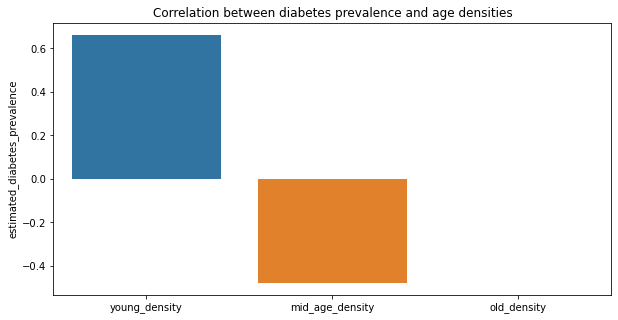

In [432]:
plt.figure(figsize = (10,5))
sns.barplot(x = rho.index.drop("estimated_diabetes_prevalence"),
            y = rho["estimated_diabetes_prevalence"].drop("estimated_diabetes_prevalence"))

plt.title("Correlation between diabetes prevalence and age densities")
plt.show()

### Interesting results so far !

No need to talk much about the results, which are quite visual ! The younger the population, the higher the estimated diabetes prevalence.
Correlation between old densities was not found to be relevant though.

Let's compare the number of gp patients in younger areas with the number of gp patients in other areas


In [433]:
df_age_diab.loc[:,"gp_patients"] = df.loc[:,"gp_patients"]
df_age_diab.loc[:,"gp_patients_diabetes"] = df.loc[:,"gp_patients_diabetes"]
df_age_diab.describe()


C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,young_density,mid_age_density,old_density,estimated_diabetes_prevalence,gp_patients,gp_patients_diabetes
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,0.219340,0.669454,0.111206,6.419261,12542.577836,808.422164
std,0.041451,0.055218,0.041301,1.935883,2918.837462,314.392908
min,0.087830,0.560937,0.036001,2.600000,170.000000,5.000000
25%,0.195506,0.623429,0.081007,5.050000,10736.000000,588.000000
50%,0.218979,0.663325,0.101562,6.200000,12595.000000,789.000000
75%,0.245115,0.711049,0.134207,7.600000,14496.500000,988.500000
max,0.359105,0.818873,0.270833,12.300000,24981.000000,1706.000000


In [434]:
rho, p_val = stats.spearmanr(df_age_diab, axis = 0)

rho = pd.DataFrame(rho, index = df_age_diab.columns, columns = df_age_diab.columns)

#place NaN on unrelevant correlations
rho.where(p_val < 0.05, inplace = True)
rho

,young_density,mid_age_density,old_density,estimated_diabetes_prevalence,gp_patients,gp_patients_diabetes
young_density,1.000000,-0.627104,NaN,0.659689,0.157868,0.582067
mid_age_density,-0.627104,1.000000,-0.673621,-0.476433,0.246680,-0.236311
old_density,NaN,-0.673621,1.000000,NaN,-0.450285,-0.219290
estimated_diabetes_prevalence,0.659689,-0.476433,NaN,1.000000,0.149661,0.820858
gp_patients,0.157868,0.246680,-0.450285,0.149661,1.000000,0.634872
gp_patients_diabetes,0.582067,-0.236311,-0.219290,0.820858,0.634872,1.000000


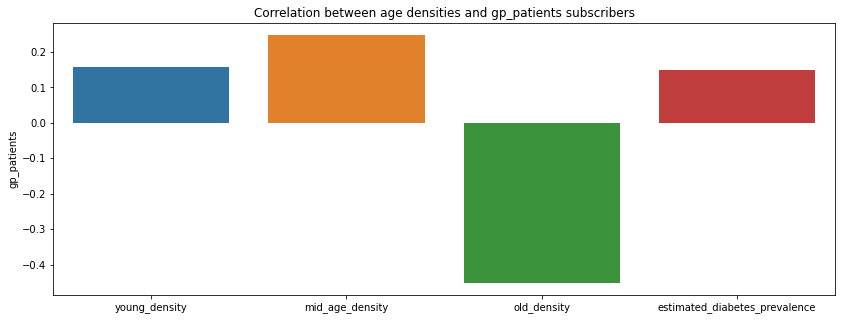

In [435]:
plt.figure(figsize = (14,5))
sns.barplot(x = rho.index.drop(["gp_patients", "gp_patients_diabetes"]),
            y = rho["gp_patients"].drop(["gp_patients", "gp_patients_diabetes"]))

plt.title("Correlation between age densities and gp_patients subscribers")
plt.show()

Mid age density is slightly more correlated with the registrations at a gp practice than younger densities areas. But the number of gp patients is also slightly positively correlated with the estimated diabetes prevalence.

From this correlations plot, we conclude that the correlations found in figure are meaningful. 

We also see that the older the population is, the less subscribers at a gp there are. which can explain the fact why the old_density was not taken into account when passing through our correlation filter (p < 0.05)

We are therefore primarily going to focus on the young and mid_age populations.

 ### So, why ? 

We now we would like to know why younger populations tend to have a higher diabetes prevalence estimate.
To do so, we are going to compare the food habits of young populations compared to the others. We are only keeping correlations > 0.25 in absolute value

### Which types of products prefer the young person ? 

In [436]:
df_prod = df[["f_beer","f_dairy","f_eggs","f_fats_oils"
              ,"f_fish","f_fruit_veg","f_grains","f_meat_red"
              ,"f_poultry","f_readymade","f_sauces","f_soft_drinks"
              ,"f_spirits","f_sweets","f_tea_coffee","f_water","f_wine"
              , "young_density"
              , "mid_age_density", "old_density"]]

In [437]:
rho, p_val = stats.spearmanr(df_prod, axis = 0)

rho = pd.DataFrame(rho, index = df_prod.columns, columns = df_prod.columns)

#place NaN on unrelevant correlations
rho.where(p_val < 0.05, inplace = True)
rho.where(abs(rho) > 0.25, inplace = True)

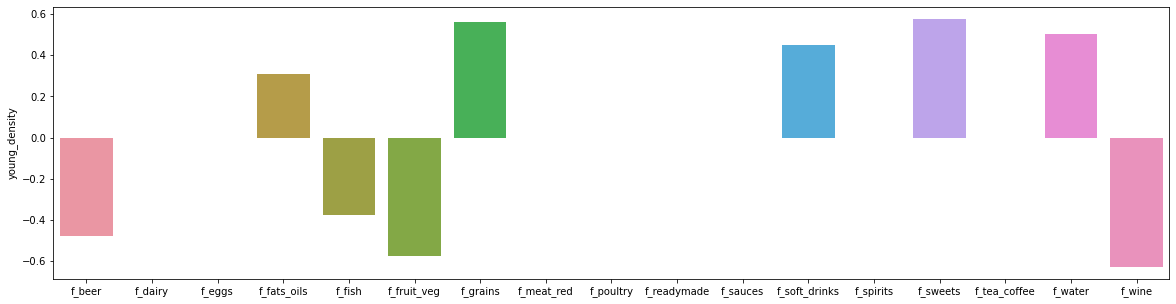

In [438]:
plt.figure(figsize = (20,5))
sns.barplot(x = rho.index.drop(["young_density", "mid_age_density", "old_density"]),
            y = rho.drop(["young_density", "mid_age_density", "old_density"])["young_density"])
plt.show() 

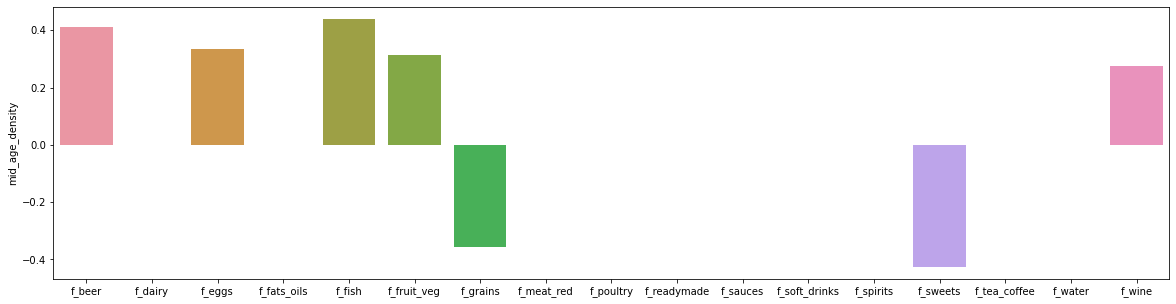

In [439]:
plt.figure(figsize = (20,5))
sns.barplot(x = rho.index.drop(["young_density", "mid_age_density", "old_density"]),
            y = rho.drop(["young_density", "mid_age_density", "old_density"])["mid_age_density"])
plt.show()

In [440]:
#Creating both barplots side by side 
import numpy as np
fig = plt.figure(figsize = (20,5))
plot_df = rho[["mid_age_density", "young_density"]]
plot_df.fillna(0, inplace = True)

#Drop lines with no particular information
idx_to_drop = plot_df[(plot_df["mid_age_density"] == 0) & (plot_df["young_density"]==0)].index
plot_df.drop(idx_to_drop, inplace = True)
idx_to_drop

C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\frame.py:4323: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Index(['f_dairy', 'f_meat_red', 'f_poultry', 'f_readymade', 'f_sauces',
       'f_spirits', 'f_tea_coffee'],
      dtype='object')

<Figure size 1440x360 with 0 Axes>

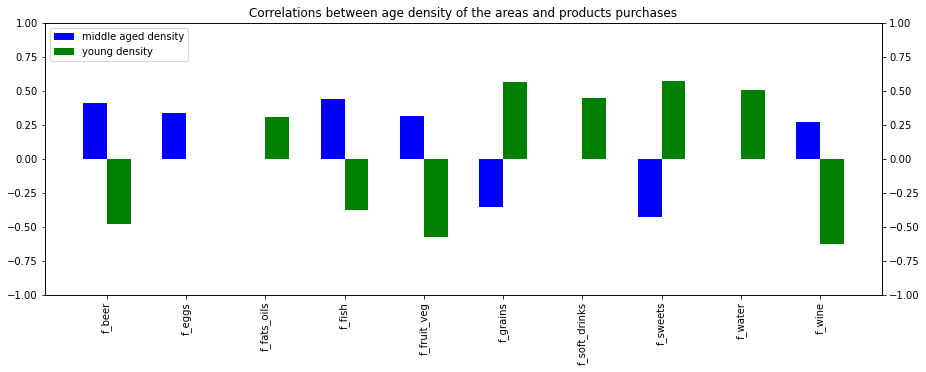

In [441]:
fig = plt.figure(figsize = (15,5))
x_ticks = plot_df.index.drop(["young_density", "mid_age_density", "old_density"])

x = np.arange(10)
ax1 = plt.subplot(1,1,1)
ax1.set_ylim([-1,1])
w = 0.3
plt.xticks(x + w/2, x_ticks, rotation = "vertical")
mid = ax1.bar(x, plot_df.drop(["young_density", "mid_age_density", "old_density"])["mid_age_density"], width = w, color = 'b', align = "center")

ax2 = ax1.twinx()
ax2.set_ylim([-1,1])
young = ax2.bar(x + w, plot_df.drop(["young_density", "mid_age_density", "old_density"])["young_density"], width = w, color = 'g', align = "center")

plt.legend([mid, young], ["middle aged density", "young density"], loc = 'upper left')
plt.title("Correlations between age density of the areas and products purchases")
plt.show()

 ### Interpretation
 
 Non surprisingly, younger populations are strongly negatively correlated with alcohol products (beer & wine). Indeed, it's illegal to buy alcohol before 18 in London !
 
 However, they are being bad students regarding fruits and vegetables products and fish. But they are keen on sweets, soft drinks and grains products !
 
 To the side of the mid-age denstiy populations it is quite the oposite (which is logical, since the less the young density, the more in the mid-age density). 

### So how are the products purchases correlated with diabetes prevalence ? 

In [442]:
df_prod.loc[:,"diabetes_prevalence"] = df.loc[:,"estimated_diabetes_prevalence"]

C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\touch\Anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [443]:
rho, p_val = stats.spearmanr(df_prod, axis = 0)

rho = pd.DataFrame(rho, index = df_prod.columns, columns = df_prod.columns)

#place NaN on unrelevant correlations
rho.where(p_val < 0.05, inplace = True)
rho.where(abs(rho) > 0.25, inplace = True)

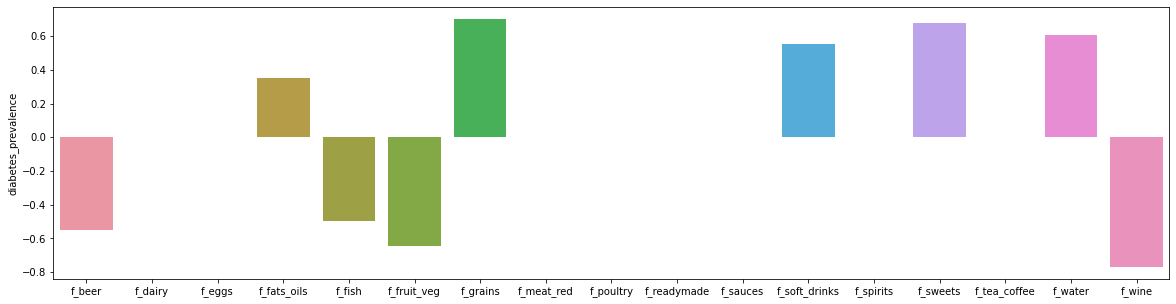

In [444]:
plt.figure(figsize = (20,5))
sns.barplot(x = rho.index.drop(["young_density", "mid_age_density", "old_density", "diabetes_prevalence"]),
            y = rho.drop(["young_density", "mid_age_density", "old_density", "diabetes_prevalence"])["diabetes_prevalence"])
plt.show()

## Déja Vu ? 
Effectively, all the products follow the same correlations trends with diabetes_prevalence and young_density areas ! 

### But wait, what ?? Is this saying that alcohol consumption decreases the risk of getting diabetes ? 

Well, according to [this](https://time.com/4876998/drinking-wine-diabetes/#:~:text=People%20who%20had%20the%20lowest,had%20a%2058%25%20reduced%20risk.) study, yes. But stay moderate !


## Some plots we could use in the story/study

### young density vs diabetes prevalence (Scatter Plot)

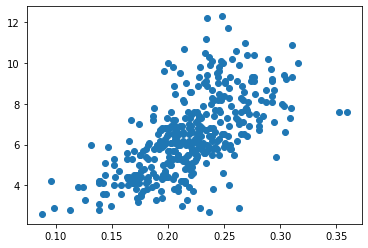

In [445]:
plt.scatter(df_prod["young_density"], df_prod["diabetes_prevalence"])
plt.show()

### mid-age density vs diabetes prevalence

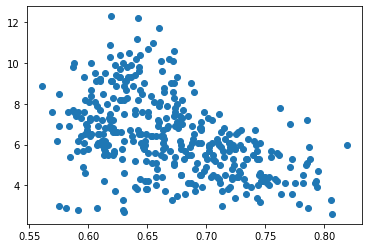

In [446]:
plt.scatter(df_prod["mid_age_density"], df_prod["diabetes_prevalence"])
plt.show()

### What about diversity ? 